# Pull the data files
Access to S3:

    Bucket name: rxr-interview
    Training data set: https://rxr-interview.s3.amazonaws.com/training_data.csv
    Holdout data set: https://rxr-interview.s3.amazonaws.com/holdout_data.csv
    Data dictionary: https://rxr-interview.s3.amazonaws.com/data_dictionary_RXR_data_science.csv
# Imports

In [10]:
import boto3
import io
import pandas as pd

## Create a  boto3 Client to S3

In [11]:
bucketname = 'rxr-interview'
filelist = [
    'training_data.csv',
    'holdout_data.csv',
    'data_dictionary_RXR_data_science.csv'
]

In [12]:
s3c = boto3.client('s3')
training = True

if training:
    # Get the training data
    fo = s3c.get_object(Bucket=bucketname, Key=filelist[0])
    # create a new dataframe
    df = pd.read_csv(io.BytesIO(fo['Body'].read()))
else:
    fo = s3c.get_object(Bucket=bucketname, Key=filelist[1])
    # create a new dataframe
    df = pd.read_csv(io.BytesIO(fo['Body'].read()))
df.head()


,member_id,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mo_sin_earliest_cr_line,percent_bc_sats,percent_bc_open_to_buy,percent_sats,percent_rev_tl_bal_gt_0,percent_tot_cur_bal_of_hi_cred_lim,label
0,70398696,15.41,244.07,150,4,30000.0,Nov 2015,12.32,0,3,...,7059,9500,0,135.0,0.714286,0.522210,1.0,1.0,0.304267,0
1,21319407,7.12,310.10,20,10,47621.0,Jun 2014,16.71,0,1,...,14585,11500,5173,380.0,0.250000,0.620348,1.0,1.0,0.337827,0
2,14899037,11.99,498.15,70,8,85000.0,2014-03,4.24,0,2,...,12047,15800,0,316.0,0.666667,0.481392,1.0,1.0,0.478056,0
3,48892270,16.55,593.75,160,-1,50400.0,2015-04,31.09,0,0,...,46582,36600,25000,544.0,0.444444,0.335328,1.0,1.0,0.756201,1
4,26208770,25.99,1043.97,330,7,144000.0,Aug 2014,26.64,0,4,...,110908,45400,48437,358.0,0.555556,0.026762,1.0,1.0,0.878576,1


In [13]:
df.shape
df.describe().transpose().to_csv(r'data_describe.csv')

In [14]:
df[['mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'mths_since_recent_bc','mths_since_recent_inq',]].isnull().sum()

mths_since_recent_bc_dlq          616758
mths_since_recent_revol_delinq    532487
mths_since_recent_bc                7415
mths_since_recent_inq              91775
dtype: int64

# Data Clean-up

In [15]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [16]:
df[['mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'mths_since_recent_bc','mths_since_recent_inq',]] = df[['mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'mths_since_recent_bc','mths_since_recent_inq',]].fillna(5_001)

In [17]:
dfsmpl = df.sample(n=500, random_state=1)
dfsmpl.to_csv(r'df_sample_raw.csv')

PermissionError: [Errno 13] Permission denied: 'df_sample_raw.csv'

In [ ]:
df.head()

## Let's see what the correlation looks like?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
sns.heatmap(df.iloc[:,1:64].corr(), annot=True )

### Check the data types

In [ ]:
df.info()

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
df.corr()

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
df.cov()


In [ ]:
df_less = df.iloc[:, 1:64]
df_less.corr()

In [ ]:
df_less.cov()

In [ ]:
df_less.corr().to_csv(r'df_less.csv')

In [ ]:
plt.figure(figsize=(64, 64), dpi=100, facecolor='w')
sns.heatmap(df_less.corr(), annot=True)
#plt.savefig('heatmap_df_less.png')


In [ ]:
# Positively correlated
list = [
    # Positive
    #'acc_now_delinq',
    #'acc_open_past_24mths',
    #'avg_cur_bal', #
    'bc_open_to_buy', ##
    'bc_util', ## inverse as well
    #'delinq_2yrs',
    'int_rate', ##
    #'mo_sin_earliest_cr_line',
    #'mo_sin_old_rev_tl_op',
    #'mo_sin_rcnt_rev_tl_op',
    #'mo_sin_rcnt_tl',
    #'mths_since_recent_bc',
    #'mths_since_recent_bc_dlq', # missing 616758 records out of 831170 (74.2%)
    #'mths_since_recent_revol_delinq', # missing 532487 records (64.1%)
    'num_actv_bc_tl', ##
    'num_actv_rev_tl', ##
    'num_bc_sats', ##
    'num_bc_tl', ##
    #'num_il_tl',
    'num_op_rev_tl', ##
    'num_rev_accts', ##
    #'num_tl_30dpd', #
    #'num_tl_90g_dpd_24m',
    #'num_tl_op_past_12m', #
    'open_acc', ##
    'percent_bc_gt_75', ## Inverse as well
    #'pub_rec',
    'revol_bal', ##
    'sub_grade', ##
    #'tax_liens',
    #'tot_hi_cred_lim',
    #'total_acc', #
    'total_bal_ex_mort', ##
    'total_bc_limit', ##
    'total_rev_hi_lim', ##
    'total_il_high_credit_limit', ##
    # # Inverse
    #'bc_util', ##
    # #'mths_since_last_major_derog',
    # #'mths_since_last_record', #
    # #'num_accts_ever_120_pd',
    # #'percent_bc_gt_75', #
    'percent_bc_open_to_buy',##
    # #'pub_rec', #
    # #'pub_rec_bankruptcies', #
    'label',
]
sorted(list)


In [ ]:
df_less_model = df.loc[:, list]
plt.figure(figsize=(36, 36), dpi=100, facecolor='w')
sns.heatmap(df_less_model.corr(), annot=True)
#plt.savefig('heatmap_df_less_model_positive.png')

In [ ]:
# df_NaN = df_less_model.isnull()
# df_row_has_NaN = df_NaN.any(axis=1)
# df_rows_with_NaN = df[df_row_has_NaN]
#
# df_rows_with_NaN[['mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'mths_since_recent_bc','mths_since_recent_inq',]]

In [ ]:
df.hist()

In [ ]:
outliers = df[(df['total_rev_hi_lim'] >= 2_000_000)].index
outliers
df.loc[outliers,['total_rev_hi_lim']]

## Looking at the hold data

In [ ]:
# hfo = s3c.get_object(Bucket=bucketname, Key=filelist[1])
# # create a new dataframe
# hdf = pd.read_csv(io.BytesIO(hfo['Body'].read()))
# hdf.info()

# SciKit-Learn Machine Learning

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression model evaluation function
from sklearn.metrics import mean_absolute_error

## Split the Data up into Input and Target Features

In [21]:
# Target
y = df_less_model['label']
# Input
X = df_less_model[[
    'bc_open_to_buy',
    'bc_util',
    'int_rate',
    'num_actv_bc_tl',
    'num_actv_rev_tl',
    'num_bc_sats',
    'num_bc_tl',
    'num_op_rev_tl',
    'num_rev_accts',
    'open_acc',
    'percent_bc_gt_75',
    'revol_bal',
    'sub_grade',
    'total_bal_ex_mort',
    'total_bc_limit',
    'total_il_high_credit_limit',
    'total_rev_hi_lim',
    'percent_bc_open_to_buy',
]]

## Rescale the data

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaleX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaleX, index=X.index, columns=X.columns)

# Split into test and training sets
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('CLF', RandomForestClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.880885 (0.000330)
LDA: 0.878804 (0.000276)
KNN: 0.872038 (0.000548)
CART: 0.923397 (0.001044)
NB: 0.785555 (0.003095)
SVM: 0.881936 (0.000007)
CLF: 0.955420 (0.000446)


NameError: name 'pyplot' is not defined

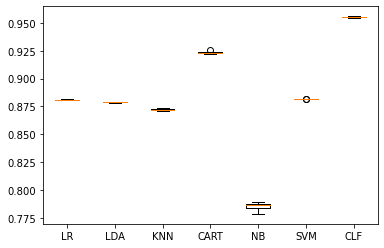

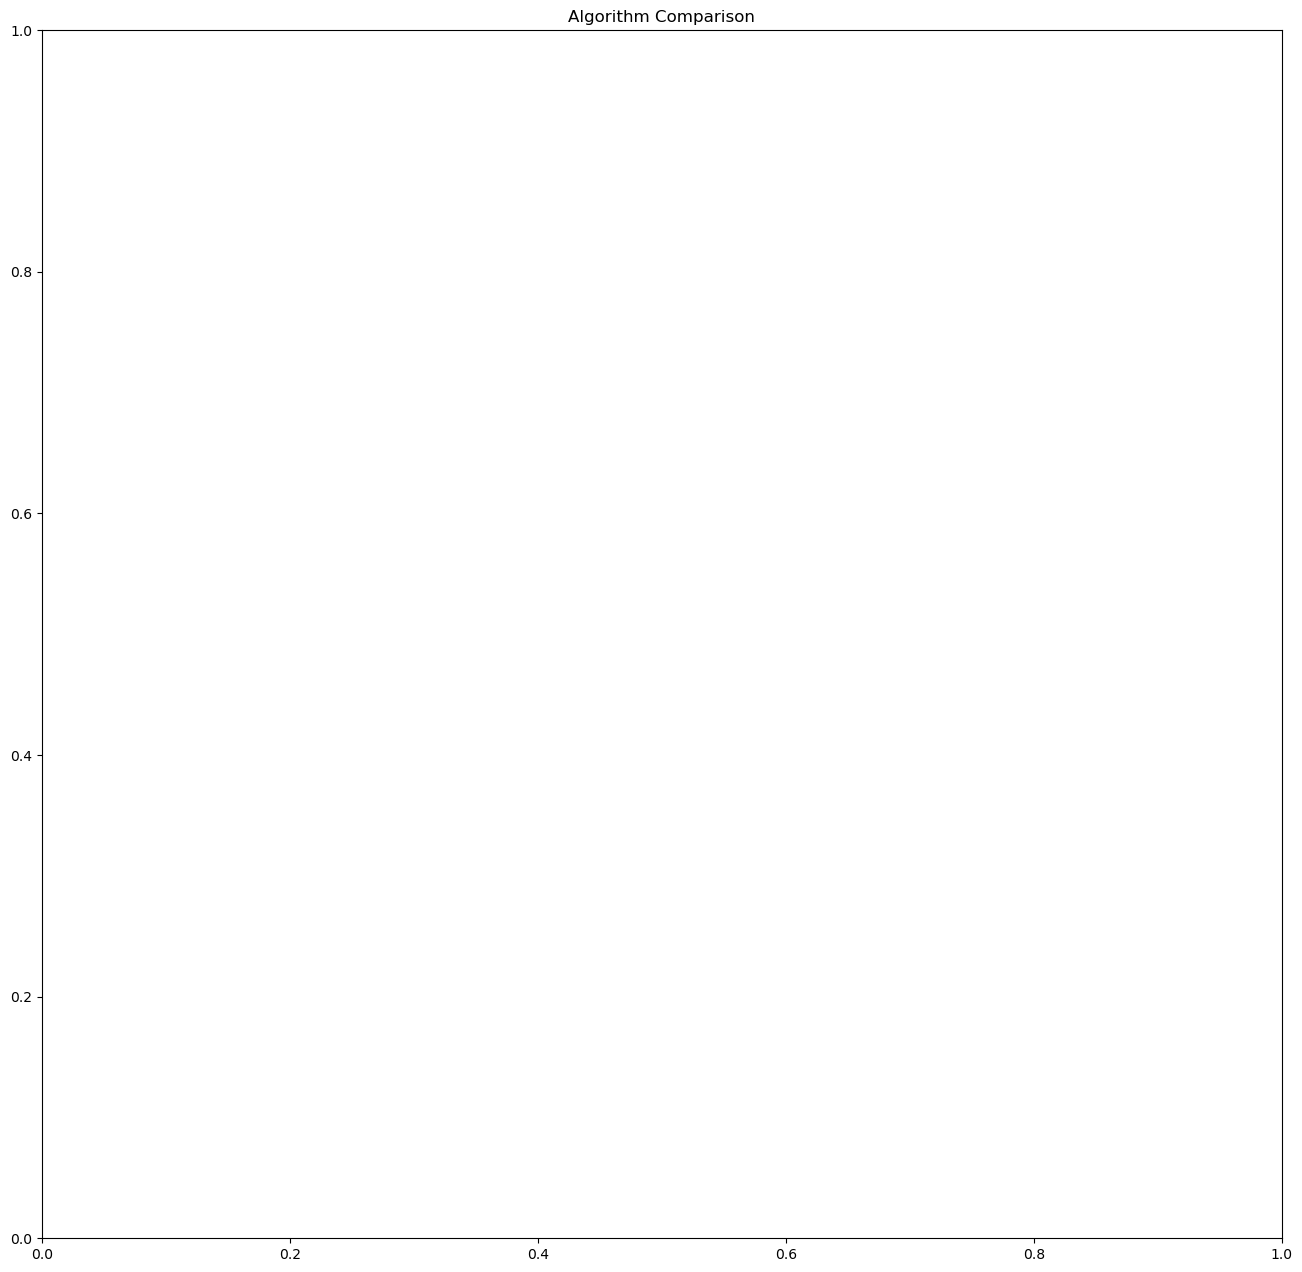

In [27]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.figure(figsize=(16, 16), dpi=100, facecolor='w')
plt.title('Algorithm Comparison')
plt.show()

## OUTPUT:
<code>
LR: 0.880885 (0.000330)<br>
LDA: 0.878804 (0.000276)<br>
KNN: 0.872038 (0.000548)<br>
CART: 0.923397 (0.001044) <-- great outcome <br>
NB: 0.785555 (0.003095)<br>
SVM: 0.881936 (0.000007) <--- took several hours to complete <br>
CLF: 0.955420 (0.000446) <-- best outcome
</code>